In [2]:
#Importovanie potrebných knižních

import pandas as pan
#- Na manipuláciu a analýzu údajov.

import numpy as np
#- Na vedecké výpočty

import matplotlib.pyplot as plt
#- Na vykreslenie grafov

import seaborn as sns

from sklearn import preprocessing
#- Na preškálovanie dát

In [3]:
#Definícia triedy Adaline GD (ADAptive LInear NEuron with Gradient Descent)
class AdalineGD(object):
    
#Parametre:
        #rychlost_ucenia : float -> Je to miera učenia programu (od 0.0 do 1.0)->O akú hodnotu sa v jednej iterácii menia váhy
        #pocecet_iteracii : int -> Počet krokov prechádajucích cez súbor údajov
    
    def __init__(self, rychlost_ucenia,pocet_iteracii): #Inicializácia 
        self.rychlost_ucenia = rychlost_ucenia
        self.pocet_iteracii = pocet_iteracii
        
#Parametere:
        #X : {array-like}, shape = [n_samples, n_features] -> Tréningové vektory, kde n_samples je počet vzoriek a n_features je počet funkcií.
        #y : array-like, shape = [n_samples] -> Cieľové hodnoty.
        #w_ : 1d-array -> Váhy po dosadení.
        #errors_ : list -> Počet nesprávnych klasifikácií v každej epoche.

#Return:
        #self    
        
    def fit(self,X,y):                                           #Metóda procesu učenia
        self.w_ = np.zeros(1+X.shape[1])                         # w- sa naplní n-nulami v závislosti od vstupu X
        self.cost_=[]                                            # vytvorí sa pole cost_
     
        for i in range (self.pocet_iteracii):                    #Cyklus od 0 po pocet_iteracii na získanie výstupu a optimalizačného problému.
            output = self.net_input(X)       
            errors = (y-output)
            self.w_[1:] += self.rychlost_ucenia * X.T.dot(errors)
            self.w_[0] += self.rychlost_ucenia * errors.sum()
            cost = (errors ** 2).sum()/2.0
            self.cost_.append(cost)    
            plt.plot(self.cost_)                                 #Vykreslenie grafu
        
        return self
    
    def net_input(self,X):                                       #Vypočíta net_input (čistý vstup)
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def linearna_aktivacia(self,X):                              #Vypočíta lineárnu aktiváciu
        return self.net_input(X)
    
    def predikcia(self,X):                                       #Vráti štítok triedy po kroku jednotky
        return np.where(self.linearna_aktivacia(X)>=0.0,1,-1)

In [4]:
CHAMP=pan.read_csv('riot_champion.csv',index_col=None)
CHAMP.tag1=CHAMP.tag1.str.replace("'","")
CHAMP.tag1=CHAMP.tag1.str.replace("[","")
CHAMP.tag1=CHAMP.tag1.str.replace("]","")
CHAMP.tag2=CHAMP.tag2.str.replace("'","")
CHAMP.tag2=CHAMP.tag2.str.replace("[","")
CHAMP.tag2=CHAMP.tag2.str.replace("]","")
CHAMP=CHAMP.sort_values(by=['rangecategory'])
CHAMP

,key,name,title,tag1,tag2,partype,rangecategory,info.attack,info.defense,info.magic,...,stats.spellblock,stats.spellblockperlevel,stats.hpregen,stats.hpregenperlevel,stats.mpregen,stats.mpregenperlevel,stats.attackdamage,stats.attackdamageperlevel,stats.attackspeedperlevel,stats.attackspeed
54,10,Kayle,the Righteous,Fighter,Support,Mana,Both,6,6,7,...,34.0,0.50,5.00,0.50,8.000,0.800,50.000,2.500,1.500,0.625
34,150,Gnar,the Missing Link,Fighter,Tank,Rage,Both,6,5,5,...,30.0,0.50,4.50,1.75,0.000,0.000,59.000,3.000,6.000,0.625
45,126,Jayce,the Defender of Tomorrow,Fighter,Marksman,Mana,Both,8,4,3,...,30.0,0.50,6.00,0.60,6.000,0.800,54.000,4.250,3.000,0.658
80,76,Nidalee,the Bestial Huntress,Assassin,Mage,Mana,Both,5,4,7,...,30.0,0.50,6.00,0.60,6.000,0.800,61.000,3.500,3.220,0.638
25,60,Elise,the Spider Queen,Mage,Fighter,Mana,Both,6,5,7,...,30.0,0.50,5.50,0.60,6.000,0.800,55.000,3.000,1.750,0.625
94,58,Renekton,the Butcher of the Sands,Fighter,Tank,Fury,Melee,8,5,2,...,32.1,1.25,8.00,0.75,0.000,0.000,69.000,3.750,2.750,0.665
93,421,Rek'Sai,the Void Burrower,Fighter,Null,Rage,Melee,8,5,2,...,32.1,1.25,7.50,0.65,0.000,0.000,64.000,3.000,2.000,0.667
92,33,Rammus,the Armordillo,Tank,Fighter,Mana,Melee,4,10,5,...,32.1,1.25,8.00,0.55,7.840,0.500,55.880,3.500,2.215,0.656
88,555,Pyke,the Bloodharbor Ripper,Support,Assassin,Mana,Melee,9,3,1,...,32.0,1.50,7.00,0.50,8.000,1.000,62.000,2.000,2.500,0.667
87,78,Poppy,Keeper of the Hammer,Tank,Fighter,Mana,Melee,6,7,2,...,32.0,1.25,8.00,0.80,7.000,0.700,64.000,4.000,2.500,0.625


In [5]:
X=CHAMP.iloc[0:CHAMP.key.count(),7:30].values
X

array([[6.   , 6.   , 7.   , ..., 2.5  , 1.5  , 0.625],
       [6.   , 5.   , 5.   , ..., 3.   , 6.   , 0.625],
       [8.   , 4.   , 3.   , ..., 4.25 , 3.   , 0.658],
       ...,
       [4.   , 3.   , 7.   , ..., 3.1  , 2.61 , 0.644],
       [3.   , 5.   , 7.   , ..., 1.5  , 2.95 , 0.625],
       [4.   , 3.   , 8.   , ..., 3.2  , 2.11 , 0.625]])

In [6]:
#Po naplnení údajov tieto údaje zmení na hodnoty -1 alebo 1 v závislosti, či sa jedná o kosatca sibírskeho alebo o kosatca rôznofarebného


y=np.where(CHAMP.rangecategory.str.contains("Melee"),-1,1)
y

array([ 1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [78]:
Ranged=CHAMP.key[CHAMP.rangecategory=="Ranged"].count()
Mage=CHAMP.key[(CHAMP.tag1=="Mage")&(CHAMP.rangecategory=="Ranged")].count()
ADC=CHAMP.key[(CHAMP.tag1=="Marksman")&(CHAMP.rangecategory=="Ranged")].count()
RSupp=CHAMP.key[(CHAMP.tag1=="Support")&(CHAMP.rangecategory=="Ranged")].count()
RAssassin=CHAMP.key[(CHAMP.tag1=="Assassin")&(CHAMP.rangecategory=="Ranged")].count()
RFighter=CHAMP.key[(CHAMP.tag1=="Fighter")&(CHAMP.rangecategory=="Ranged")].count()

Melee=CHAMP.key[CHAMP.rangecategory=="Melee"].count()
Fighter=CHAMP.key[(CHAMP.tag1=="Fighter")&(CHAMP.rangecategory=="Melee")].count()
Tank=CHAMP.key[(CHAMP.tag1=="Tank")&(CHAMP.rangecategory=="Melee")].count()
Assassin=CHAMP.key[(CHAMP.tag1=="Assassin")&(CHAMP.rangecategory=="Melee")].count()
MSupp=CHAMP.key[(CHAMP.tag1=="Support")&(CHAMP.rangecategory=="Melee")].count()
MMage=CHAMP.key[(CHAMP.tag1=="Mage")&(CHAMP.rangecategory=="Melee")].count()
print("Štatistika: \n\nPočet Ranged Championov: ",Ranged,"\nPočet Mágov: ",Mage,"\nPočet ADC: ",ADC,"\nPočet Supp:",RSupp,"\nPočet Assasinov:",RAssassin,"\nPočet Fighterov:",RFighter)
print("\n\nPočet Melee Championov: ",Melee,"\nPočet Mágov: ",MMage,"\nPočet Supp:",MSupp,"\nPočet Assasinov:",Assassin,"\nPočet Fighterov:",Fighter,"\nPočet Tankov:",Tank)

Štatistika: 

Počet Ranged Championov:  69 
Počet Mágov:  31 
Počet ADC:  24 
Počet Supp: 11 
Počet Assasinov: 2 
Počet Fighterov: 1


Počet Melee Championov:  74 
Počet Mágov:  1 
Počet Supp: 4 
Počet Assasinov: 13 
Počet Fighterov: 37 
Počet Tankov: 19


Grafická vizualizácia Meele a Ranged championov na základe Attack damage a Attack damage per level


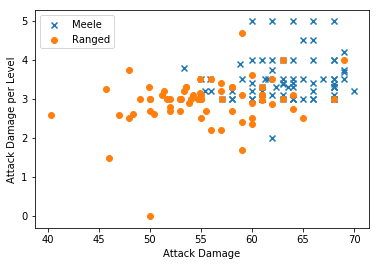

In [8]:
Pocet_prvej_Skupiny=CHAMP.rangecategory.str.count("Melee").sum()+5 

plt.scatter(X[5:Pocet_prvej_Skupiny,17],X[5:Pocet_prvej_Skupiny,18],marker='x',label='Meele') 
plt.scatter(X[Pocet_prvej_Skupiny:CHAMP.key.count(),17],X[Pocet_prvej_Skupiny:CHAMP.key.count(),18],marker='o',label='Ranged')

plt.xlabel('Attack Damage') #Pomenovanie X-ovej súradnicovej sústavy
plt.ylabel('Attack Damage per Level') #Pomenovanie Y-ovej súradnicovej sústavy
plt.legend()    

print("Grafická vizualizácia Meele a Ranged championov na základe Attack damage a Attack damage per level");

Grafická vizualizácia Fighterov a Assassinov na základe HP a HP per level


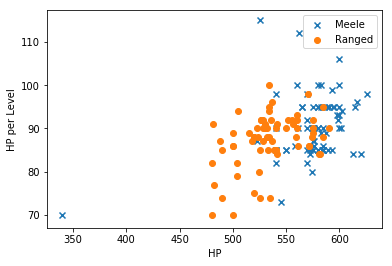

In [9]:
plt.scatter(X[5:Pocet_prvej_Skupiny,6],X[5:Pocet_prvej_Skupiny,7],marker='x',label='Meele') 
plt.scatter(X[Pocet_prvej_Skupiny:CHAMP.key.count(),6],X[Pocet_prvej_Skupiny:CHAMP.key.count(),7],marker='o',label='Ranged')

plt.xlabel('HP') #Pomenovanie X-ovej súradnicovej sústavy
plt.ylabel('HP per Level') #Pomenovanie Y-ovej súradnicovej sústavy
plt.legend()    

print("Grafická vizualizácia Fighterov a Assassinov na základe HP a HP per level");

Úroveň obtiažnosti hrania pre prvú skupinu


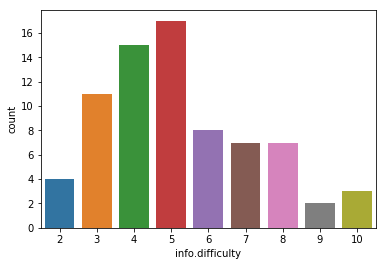

In [10]:
prva=CHAMP[CHAMP.rangecategory=="Melee"]
sns.countplot(x=prva["info.difficulty"])
print("Úroveň obtiažnosti hrania pre prvú skupinu")


Úroveň obtiažnosťi hrania pre druhú skupinu


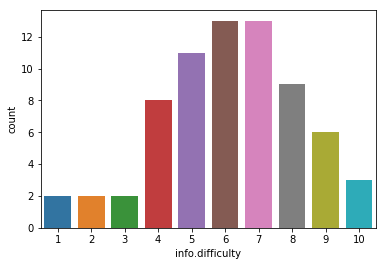

In [11]:
druha=CHAMP[CHAMP.rangecategory=="Ranged"]
sns.countplot(x=druha["info.difficulty"])
print("Úroveň obtiažnosťi hrania pre druhú skupinu")

Úroveň obtiažnosťi hrania pre tretiu skupinu


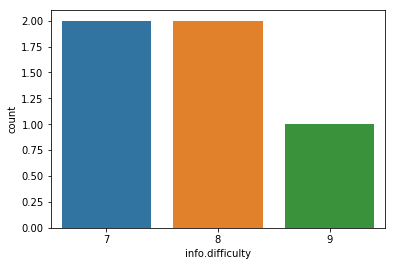

In [12]:
tretia=CHAMP[CHAMP.rangecategory=="Both"]
sns.countplot(x=tretia["info.difficulty"])
print("Úroveň obtiažnosťi hrania pre tretiu skupinu")

Grafické porovnanie Magicu


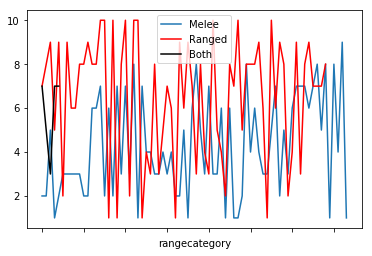

In [13]:
print("Grafické porovnanie Magicu");
ax = plt.gca()
prva.plot(kind='line',x='rangecategory',y='info.magic',ax=ax,)
druha.plot(kind='line',x='rangecategory',y='info.magic', color='red', ax=ax,)
tretia.plot(kind='line',x='rangecategory',y='info.magic', color='black', ax=ax,)
ax.legend(["Melee", "Ranged","Both"]);
plt.show()

Grafické porovnanie Defense


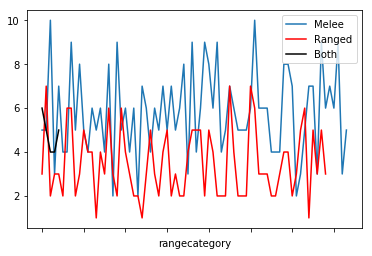

In [14]:
print("Grafické porovnanie Defense");
ax = plt.gca()
prva.plot(kind='line',x='rangecategory',y='info.defense',ax=ax,)
druha.plot(kind='line',x='rangecategory',y='info.defense', color='red', ax=ax,)
tretia.plot(kind='line',x='rangecategory',y='info.defense', color='black', ax=ax,)
ax.legend(["Melee", "Ranged","Both"]);
plt.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:30: RuntimeWarning: overflow encountered in square
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/core/_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


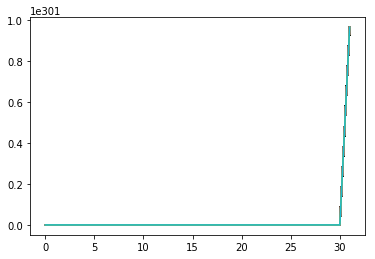

In [15]:
MojAdalineGD=AdalineGD(rychlost_ucenia=0.001,pocet_iteracii=1000) #Zadefinovanie vlastnej premennej s triedou Adeline GD
MojAdalineGD.fit(X,y)  

In [16]:

X1=preprocessing.scale(X) #Funkcia scale() vydelí hodnoty z premennej X štandardnou odchýlkou a odčíta sa priemer pre každý dátový bod

print("Porovnanie prvých štyroch údajov z premennej X a X1")
print(X[0,0],X[0,1],X[1,0],X[1,1])
print(X1[0,0],X1[0,1],X1[1,0],X1[1,1])

Porovnanie prvých štyroch údajov z premennej X a X1
6.0 6.0 6.0 5.0
0.18576189008219907 0.6274341201072617 0.18576189008219907 0.1462929295586881


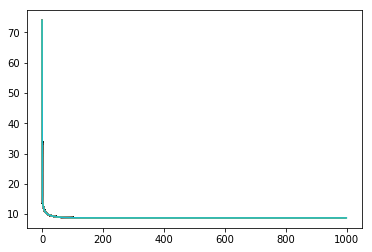

In [17]:
MojAdalineGD.fit(X1,y)     #Spustenie metódy fit() s hodnotami X1 (Preškálované hodnoty z premennej X) a y

In [18]:
from keras.models import Sequential
from keras.layers import Dense

from keras.utils import np_utils
from keras.utils import to_categorical

Using TensorFlow backend.


In [22]:
#Zvolime si sekvenčny model
model=Sequential()

model.add(Dense(30,input_dim=21,activation='sigmoid'))
#počet vsutom 4 s akt. funkcou

model.add(Dense(30,activation='sigmoid'))
#počet neurovon-30

model.add(Dense(2))
#pridanie vrstiev

In [23]:
kategoricka_premenna=np_utils.to_categorical(y)

In [24]:
model.compile(loss='mean_squared_error',optimizer='sgd',metrics=['accuracy'])

model.fit(X1,kategoricka_premenna)

scores=model.evaluate(X1,kategoricka_premenna)

Epoch 1/1
148/148 [==============================] - 0s 1ms/step


In [25]:
print("\nPresnosť siete: %.2f%%"%(scores[1]*100))


Presnosť siete: 100.00%
